In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import requests
from config import weather_api_key
from citipy import citipy 

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000 , high = 90.000 , size = 1500)
lngs = np.random.uniform(low =-180.000 , high = 180.000, size = 1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
cities = []

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

611

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | chapais
Processing Record 4 of Set 1 | leningradskiy
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | mazatlan
Processing Record 7 of Set 1 | dali
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | amderma
City not found. Skipping...
Processing Record 11 of Set 1 | chuy
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | plettenberg bay
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | vuktyl
Processing Record 17 of Set 1 | shaowu
Processing Record 18 of Set 1 | esperance
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | vysokogornyy
Processing Record 21 of Set 1 | kaitangata
Processing Recor

Processing Record 36 of Set 4 | hargeysa
Processing Record 37 of Set 4 | lavrentiya
Processing Record 38 of Set 4 | yining
Processing Record 39 of Set 4 | kralendijk
Processing Record 40 of Set 4 | saint-francois
Processing Record 41 of Set 4 | ugoofaaru
Processing Record 42 of Set 4 | galiwinku
City not found. Skipping...
Processing Record 43 of Set 4 | mocambique
City not found. Skipping...
Processing Record 44 of Set 4 | ritchie
Processing Record 45 of Set 4 | cherskiy
Processing Record 46 of Set 4 | east london
Processing Record 47 of Set 4 | preveza
Processing Record 48 of Set 4 | broome
Processing Record 49 of Set 4 | grenaa
Processing Record 50 of Set 4 | alofi
Processing Record 1 of Set 5 | taga
Processing Record 2 of Set 5 | geraldton
Processing Record 3 of Set 5 | kloulklubed
Processing Record 4 of Set 5 | namatanai
Processing Record 5 of Set 5 | along
Processing Record 6 of Set 5 | maceio
Processing Record 7 of Set 5 | berlevag
Processing Record 8 of Set 5 | salisbury
Proces

Processing Record 24 of Set 8 | tlahualilo
City not found. Skipping...
Processing Record 25 of Set 8 | abu samrah
Processing Record 26 of Set 8 | cayenne
Processing Record 27 of Set 8 | simao
Processing Record 28 of Set 8 | manavalakurichi
Processing Record 29 of Set 8 | sayyan
Processing Record 30 of Set 8 | sambava
Processing Record 31 of Set 8 | luena
Processing Record 32 of Set 8 | te anau
Processing Record 33 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 34 of Set 8 | saldanha
Processing Record 35 of Set 8 | tecoanapa
Processing Record 36 of Set 8 | greenville
Processing Record 37 of Set 8 | hambantota
Processing Record 38 of Set 8 | awbari
Processing Record 39 of Set 8 | roebourne
Processing Record 40 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 41 of Set 8 | shache
Processing Record 42 of Set 8 | pilar
Processing Record 43 of Set 8 | moree
Processing Record 44 of Set 8 | sisimiut
Processing Record 45 of Set 8 | clarence town
Proce

Processing Record 13 of Set 12 | lewistown
Processing Record 14 of Set 12 | port washington
Processing Record 15 of Set 12 | baykit
Processing Record 16 of Set 12 | cassia
Processing Record 17 of Set 12 | rumford
Processing Record 18 of Set 12 | lata
Processing Record 19 of Set 12 | tashkent
Processing Record 20 of Set 12 | one hundred mile house
City not found. Skipping...
Processing Record 21 of Set 12 | puri
Processing Record 22 of Set 12 | kysyl-syr
Processing Record 23 of Set 12 | crawfordsville
Processing Record 24 of Set 12 | asfi
Processing Record 25 of Set 12 | roma
Processing Record 26 of Set 12 | moussoro
Processing Record 27 of Set 12 | porgera
Processing Record 28 of Set 12 | kenai
Processing Record 29 of Set 12 | garoua
Processing Record 30 of Set 12 | grenfell
Processing Record 31 of Set 12 | surovatikha
Processing Record 32 of Set 12 | troitsko-pechorsk
Processing Record 33 of Set 12 | ipatovo
Processing Record 34 of Set 12 | hun
Processing Record 35 of Set 12 | samusu


In [7]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mar Del Plata,-38.0023,-57.5575,75.22,91,0,3.00,AR,2021-10-21 22:37:53
1,Puerto Ayora,-0.7393,-90.3518,76.96,81,64,9.44,EC,2021-10-21 22:37:32
2,Chapais,49.7834,-74.8492,38.98,84,100,3.58,CA,2021-10-21 22:41:55
3,Leningradskiy,69.3833,178.4167,10.18,89,85,14.79,RU,2021-10-21 22:37:47
4,Yellowknife,62.4560,-114.3525,45.41,70,20,16.11,CA,2021-10-21 22:37:29


In [8]:
new_column_order =['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mar Del Plata,AR,2021-10-21 22:37:53,-38.0023,-57.5575,75.22,91,0,3.00
1,Puerto Ayora,EC,2021-10-21 22:37:32,-0.7393,-90.3518,76.96,81,64,9.44
2,Chapais,CA,2021-10-21 22:41:55,49.7834,-74.8492,38.98,84,100,3.58
3,Leningradskiy,RU,2021-10-21 22:37:47,69.3833,178.4167,10.18,89,85,14.79
4,Yellowknife,CA,2021-10-21 22:37:29,62.4560,-114.3525,45.41,70,20,16.11


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

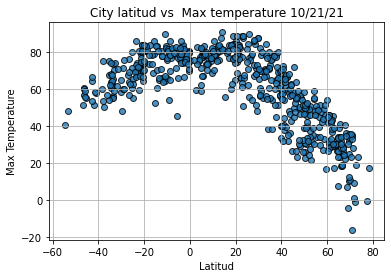

In [12]:
import time

plt.scatter(lats, max_temps, edgecolor='black',linewidths = 1, marker='o', alpha = 0.8, label = "Cities")


plt.title(f"City latitud vs  Max temperature " + time.strftime('%x'))
plt.xlabel('Latitud')
plt.ylabel('Max Temperature')
plt.grid(True)
plt.savefig('weather_data/Fig1.png')


plt.show()

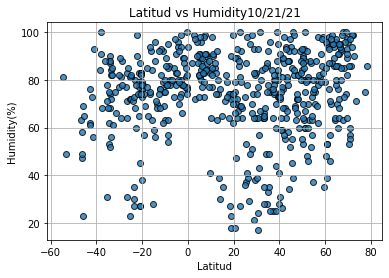

In [13]:
plt.scatter(lats ,humidity, edgecolor = 'black', linewidths = 1, marker = 'o', alpha =0.8, label = "Cities")

plt.title(f'Latitud vs Humidity' +time.strftime('%x') )
plt.xlabel("Latitud")
plt.ylabel("Humidity(%)")
plt.grid(True)
plt.savefig('weather_data/Fig2.png')
plt.show()

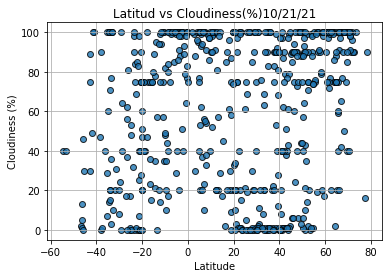

In [14]:
plt.scatter(lats, cloudiness, edgecolor = "black", linewidth = 1, marker = 'o', alpha = 0.8, label = "Cities")
plt.title(f'Latitud vs Cloudiness(%)' + time.strftime('%x'))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

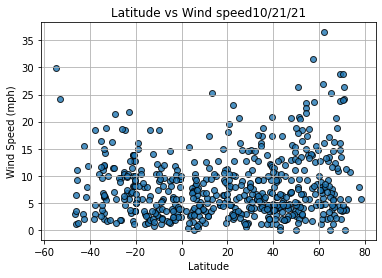

In [15]:
plt.scatter(lats,wind_speed, edgecolor = 'black', linewidth = 1 , marker = 'o', alpha = 0.8, label = 'Cities' )

plt.title(f'Latitude vs Wind speed' + time.strftime('%x'))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()